In [2]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os


def plotxyz(t, list_array_xyz, list_label, ylim=None):
    for i in range(3):
        plt.figure(figsize=(10, 3))
        for j in range(len(list_array_xyz)):
            plt.plot(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
            # plt.scatter(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
        plt.legend()
        if ylim is not None:
            plt.ylim(ylim)
        plt.show()

['cfctl_1113194059.txt', 'cfctl_1113002513.txt', 'att_pid_1111175841.txt', '2023-11-08_18-58-37_log_1107_2110', 'att_pid_1111184129.txt', 'att_pid_1112005026.txt', 'cfctl_1113164035.txt', 'att_pid_1112142130.txt', '2023-11-08_18-58-37_log06', '2023-11-08_18-58-37_log13', '2023-11-12_15-42-46_log07', 'att_pid_1111235747.txt', 'att_pid_1111205529.txt', 'att_pid_1112161621.txt', 'att_pid_1112211039.txt', '2023-11-12_15-22-41_log05', 'att_pid_1112160312.txt', '2023-11-08_18-58-37_log_1107_1742', '2023-11-12_15-50-25_log00', 'att_pid_1111180125.txt', '2023-11-08_18-58-37_log_1107_2133', 'att_pid_1112003017.txt', 'att_pid_1112162340.txt', 'cfctl_1113165113.txt', 'cfctl_1113191509.txt', 'att_pid_1111181023.txt', 'att_pid_1112003859.txt', 'cfctl_1113183943.txt', 'att_pid_1112160904.txt', 'cfctl_1113000116.txt', '2023-11-10_17-32-07_log06', '2023-11-10_21-57-36_log00', '2023-11-10_22-12-01_log00', 'cfctl_1113185516.txt', 'cfctl_1113011158.txt', '2023-11-12_15-22-41_log01', 'att_pid_1111233620.t

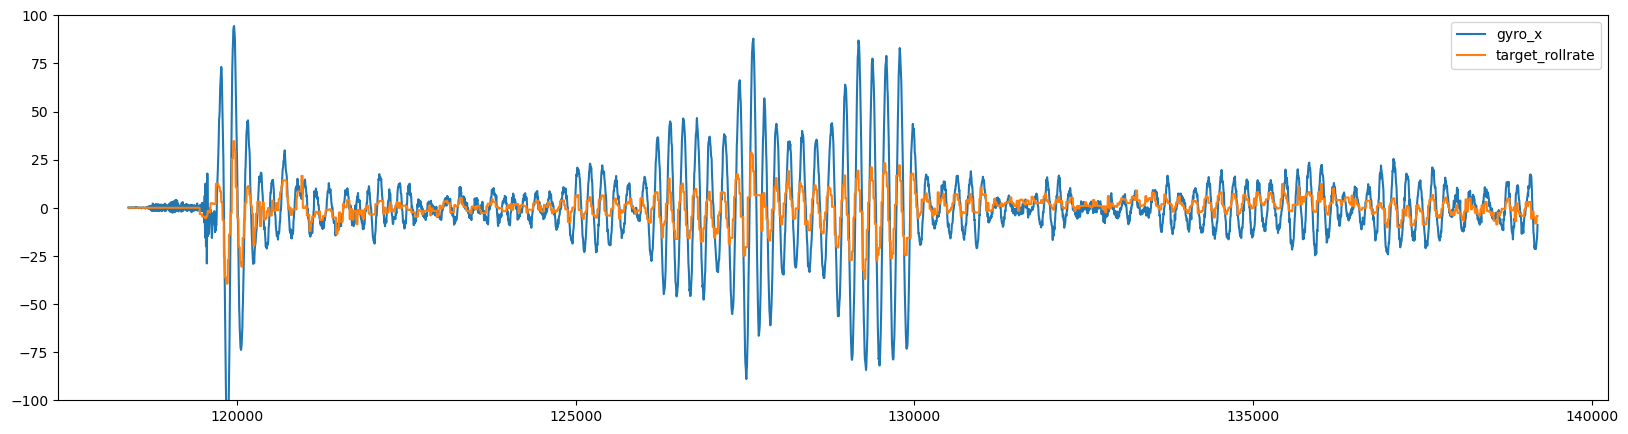

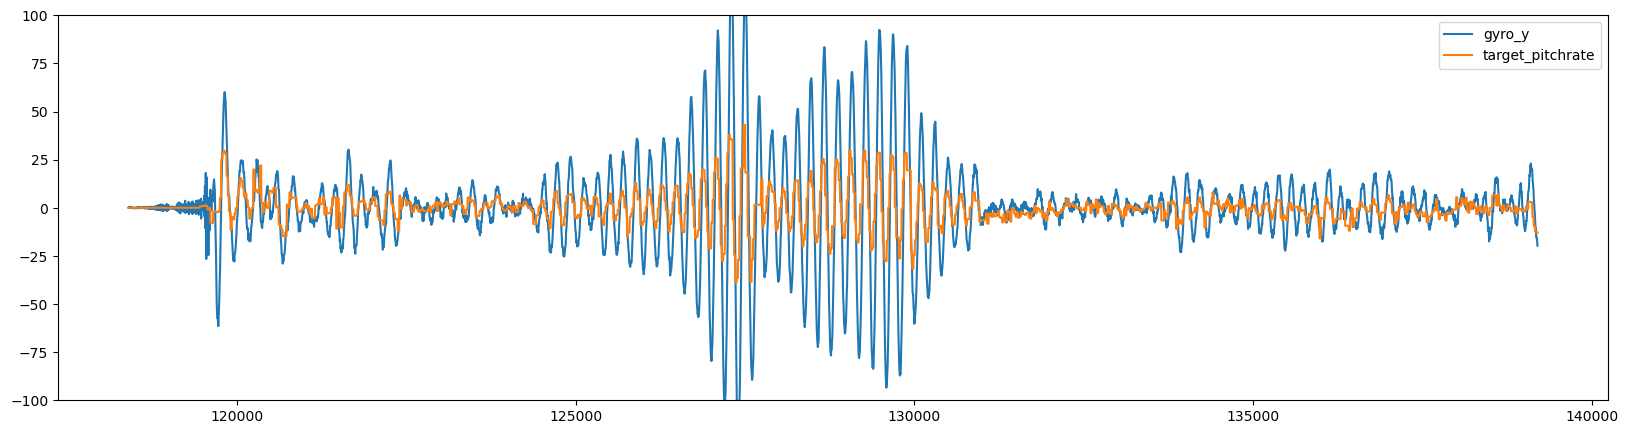

In [10]:
folder = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/"
print(os.listdir(folder))
file = f"{folder}2023-11-12_15-50-25_log01"

data_usd = cfusdlog.decode(file)
print(data_usd.keys())
fixed_freq = data_usd['fixedFrequency']
print(fixed_freq.keys())

t = fixed_freq['timestamp']
gyro_x = fixed_freq['gyro.x']
gyro_y = fixed_freq['gyro.y']
gyro_z = fixed_freq['gyro.z']
target_rollrate = fixed_freq['ctrltarget.rollRate']
target_pitchrate = fixed_freq['ctrltarget.pitchRate']
target_yawrate = fixed_freq['ctrltarget.yawRate']

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_x, label='gyro_x')
plt.plot(t, target_rollrate, label='target_rollrate')
print(target_rollrate)
plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_y, label='gyro_y')
plt.plot(t, target_pitchrate, label='target_pitchrate')
plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_z, label='gyro_z')
plt.plot(t, target_yawrate, label='target_yawrate')
plt.ylim([-100, 100])
plt.legend()


# plot 'ctrlAtt.omegaErr_x', 'ctrlAtt.omegaErr_y', 'ctrlAtt.omegaErr_z', 'ctrlAtt.omegaDot_x', 'ctrlAtt.omegaDot_y', 'ctrlAtt.omegaDot_z', 'ctrlAtt.last_err_x', 'ctrlAtt.last_err_y', 'ctrlAtt.last_err_z'
omega_err_x = fixed_freq['ctrlrate.omegaErr_x']  
omega_err_y = fixed_freq['ctrlrate.omegaErr_y']
omega_err_z = fixed_freq['ctrlrate.omegaErr_z']
omega_dot_x = fixed_freq['ctrlrate.omegaDot_x']
omega_dot_y = fixed_freq['ctrlrate.omegaDot_y']
omega_dot_z = fixed_freq['ctrlrate.omegaDot_z']
last_err_x = fixed_freq['ctrlrate.last_err_x']
last_err_y = fixed_freq['ctrlrate.last_err_y']
last_err_z = fixed_freq['ctrlrate.last_err_z']

kp_rp_rate=180.0
ki_rp_rate= 35.0 #45.0 works good for 3 battery
kp_yaw_rate= 70.0
ki_yaw_rate= 15.0

plt.figure(figsize=(10, 5))
plt.plot(t, omega_err_x*kp_rp_rate, label='omega_err_x')
plt.plot(t, omega_dot_x, label='omega_dot_x')
plt.plot(t, last_err_x*ki_rp_rate, label='last_err_x')
plt.ylim([-200, 200])
plt.legend()

plt.figure(figsize=(10, 5))
plt.plot(t, omega_err_y*kp_rp_rate, label='omega_err_y')
plt.plot(t, omega_dot_y, label='omega_dot_y')
plt.plot(t, last_err_y*ki_rp_rate, label='last_err_y')
plt.ylim([-200, 200])
plt.legend()

plt.figure(figsize=(10, 5))
plt.plot(t, omega_err_z*kp_yaw_rate, label='omega_err_z')
plt.plot(t, omega_dot_z, label='omega_dot_z')
plt.plot(t, last_err_z*ki_yaw_rate, label='last_err_z')
plt.ylim([-200, 200])
plt.legend()




In [ ]:
path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/cfctl_1113191034.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data.keys())

#dict_keys(['pos_err', 'vel_err', 'err_i', 'angle_err', 'err_i_att', 'time', 'pos_cur', 'vel_cur', 'omega_cur', 'ang_cur', 'pos_tar', 'vel_tar', 'omega_tar', 'ang_tar'])
pos_err = np.array(data['pos_err'])
vel_err = np.array(data['vel_err'])
err_i = np.array(data['err_i'])
angle_err = np.array(data['angle_err'])
err_i_att = np.array(data['err_i_att'])
time = np.array(data['time'])
pos_cur = np.array(data['pos_cur'])
vel_cur = np.array(data['vel_cur'])
omega_cur = np.array(data['omega_cur'])
ang_cur = np.array(data['ang_cur'])
pos_tar = np.array(data['pos_tar'])

vel_tar = np.array(data['vel_tar'])
omega_tar = np.array(data['omega_tar'])
ang_tar = np.array(data['ang_tar'])

f_d = np.array(data['f_d'])
thrust = np.array(data['thrust'])


print(pos_err.shape, vel_err.shape, err_i.shape, angle_err.shape, err_i_att.shape, time.shape, pos_cur.shape, vel_cur.shape, omega_cur.shape, ang_cur.shape, pos_tar.shape, vel_tar.shape, omega_tar.shape, ang_tar.shape)


plotxyz(time, [angle_err, err_i_att], ['angle_err', 'err_i_att'], [-0.01, 0.01])
plotxyz(time, [ang_cur, ang_tar], ['ang_cur', 'ang_tar'], [-0.2, 0.2])
plotxyz(time, [omega_cur, omega_tar], ['omega_cur', 'omega_tar'], [-1.0, 1.0])

plotxyz(time, [pos_cur, pos_tar], ['pos_cur', 'pos_tar'], [-2.0, 2.0])
plotxyz(time, [vel_cur, vel_tar], ['vel_cur', 'vel_tar'], [-2.0, 2.0])
plotxyz(time, [pos_err, vel_err, err_i], ['pos_err', 'vel_err', 'err_i'], [-2.0, 2.0])

plt.figure(figsize=(10, 3))
plt.plot(time, f_d, label='f_d')
plt.plot(time, thrust, label='thrust')
plt.legend()



AttributeError: 'list' object has no attribute 'keys'

dict_keys(['ang_cur', 'ang_tar', 'angle_err', 'err_i', 'err_i_att', 'f_d', 'omega_cur', 'omega_tar', 'pos_cur', 'pos_err', 'pos_tar', 'thrust', 'time', 'vel_cur', 'vel_err', 'vel_tar', 'ros_time', 'sys_time', 'pos_kf', 'quat_kf']) 500
[ 0.00297612  0.44574046 -1.4939969 ]


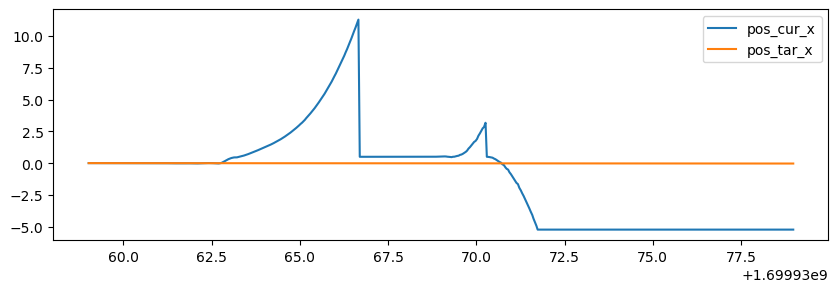

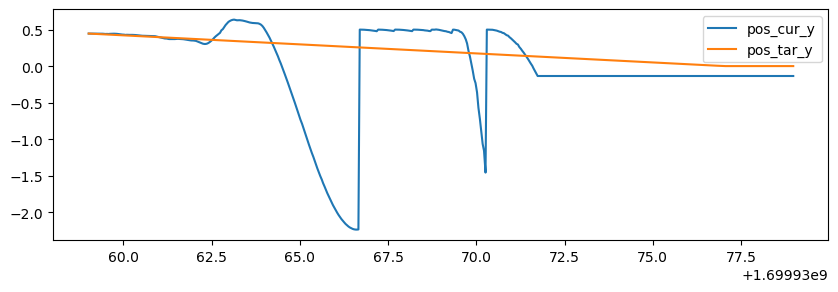

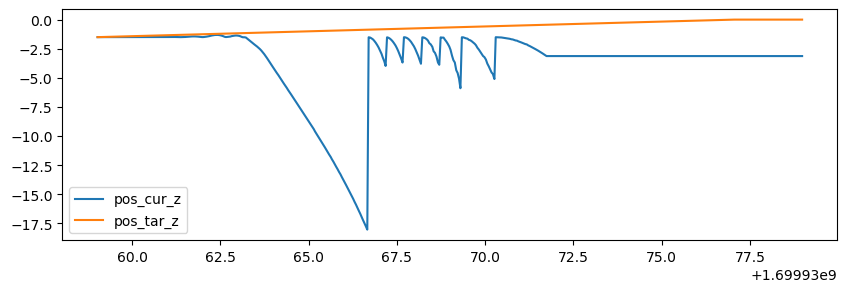

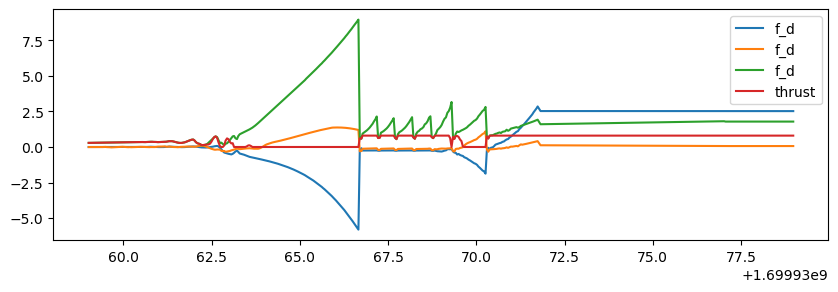

In [13]:
path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/cfctl_1113214733.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data[0].keys(), len(data))

#list-dict to dict-list
# data_dict = {key: np.array([data[i][key] for i in range(len(data))]) for key in data[0].keys()}
data_dict = {}
for key in data[0].keys():
    for i in range(len(data)):
        if key not in data_dict:
            data_dict[key] = []
        try:
            data_dict[key].append(data[i][key])
        except:
            print(key, i)
            data_dict[key].append(np.zeros_like(data_dict[key][-1]) - 0.0)

# data_dict['time'] = np.linspace(0, len(data)/50.0, len(data))

#dict_keys(['ang_cur', 'ang_tar', 'angle_err', 'err_i', 'err_i_att', 'f_d', 'omega_cur', 'omega_tar', 'pos_cur', 'pos_err', 'pos_tar', 'thrust', 'time', 'vel_cur', 'vel_err', 'vel_tar'])
#plot

pos_err = np.array(data_dict['pos_err'])
vel_err = np.array(data_dict['vel_err'])
err_i = np.array(data_dict['err_i'])
angle_err = np.array(data_dict['angle_err'])
err_i_att = np.array(data_dict['err_i_att'])
# time = np.array(data_dict['time'])
# time = np.linspace(0, len(data)/50.0, len(data))
time = np.array(data_dict['sys_time'])
pos_cur = np.array(data_dict['pos_cur'])
vel_cur = np.array(data_dict['vel_cur'])
omega_cur = np.array(data_dict['omega_cur'])
ang_cur = np.array(data_dict['ang_cur'])
pos_tar = np.array(data_dict['pos_tar'])
ang_tar = np.array(data_dict['ang_tar'])
vel_tar = np.array(data_dict['vel_tar'])
omega_tar = np.array(data_dict['omega_tar'])
f_d = np.array(data_dict['f_d'])
thrust = np.array(data_dict['thrust'])

pos_kf = np.array(data_dict['pos_kf'])
quat_kf = np.array(data_dict['quat_kf'])

print(pos_cur[0])

# plotxyz(time, [angle_err, err_i_att], ['angle_err', 'err_i_att'])
# plotxyz(time, [ang_cur, ang_tar], ['ang_cur', 'ang_tar'])
# plotxyz(time, [omega_cur, omega_tar], ['omega_cur', 'omega_tar'])

plotxyz(time, [pos_cur, pos_tar], ['pos_cur', 'pos_tar'])
# plotxyz(time, [vel_cur, vel_tar], ['vel_cur', 'vel_tar']) #, [-1.0, 1.0])
# plotxyz(time, [pos_err, vel_err, err_i], ['pos_err', 'vel_err', 'err_i'], [-10.0, 10.0])

# plotxyz(time, [pos_kf], ['pos_kf'])

plt.figure(figsize=(10, 3))
plt.plot(time, f_d, label='f_d')
plt.plot(time, thrust, label='thrust')
plt.legend()

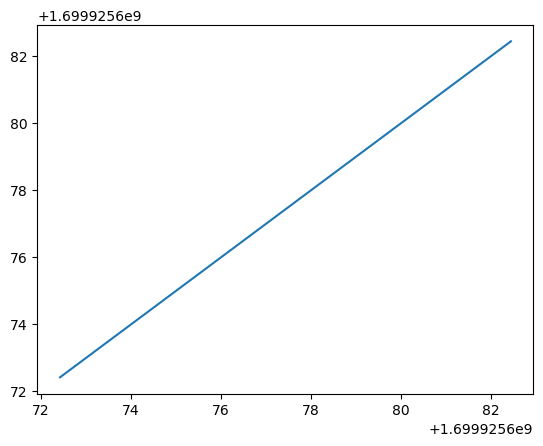

In [5]:
plt.plot(time, data_dict['sys_time'])

In [4]:
data_dict['time'][0]

Array(0, dtype=int32, weak_type=True)